# Almacenamiento de datos

## Introducción

Vamos a generar una BBDD Relacional para el almacenamiento de los registros que hemos obtenido hasta ahora.

La estructura  de la base de datos será de 5 tablas relacionadas entre sí y 1/2 views para tener un acceso más rápido a una serie de datos en el momento de hacer el llamamiento a las queries.

Realizaremos diversos llamamientos a la BBDD para visualizar los datos de la misma y hacer una evaluación de los datos de la página web.

## Librerías

In [1]:
import os
os.chdir(os.path.split(os.getcwd())[0])
folder=os.getcwd()
import pandas as pd
import numpy as np
from datetime import datetime
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from Utils import functions as f

print("El directorio en el que te encuentras ahora es",folder)

El directorio en el que te encuentras ahora es d:\Data_science\Javier\Repositorios\Proyecto_tienda_online\src


## Estructuras de la BBDD

![Estructura_tablas](../Resources/image/Relacion_tablas.jpg)

### a.- Realizando la conexión a la Base de Datos.

In [2]:
# Conectamos con la base de datos
conn = sqlite3.connect("Resources/online_shop.db")

# Obtenemos un cursor que utilizaremos para hacer las queries
cursor = conn.cursor()

## 1. Construyendo la BBDD

In [36]:
res = cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
# res = cursor.execute("SELECT name FROM sqlite_master WHERE type='view'")
for name in res:
    print(name[0])

#### PRODUCT

In [37]:
query = '''
CREATE TABLE PRODUCT  (
    ID INT (3),
    PRODUCT VARCHAR (100),
    SLOGAN VARCHAR (100),
    DESCRIPTION VARCHAR (250),
    CHARACTERISTICS VARCHAR (250),
    URL VARCHAR (50),
    PRIMARY KEY (ID)
)

'''


cursor.execute(query)

#### PRICES

In [38]:
query = '''
CREATE TABLE PRICES  (
    ID INT (3),
    ID_PRODUCT INT (3),
    REGULAR_PRICE INT (3),
    DISCOUNT_PRICE INT (3),
    DATE_DOWNLOAD VARCHAR (100),
    PRIMARY KEY (ID),
    FOREIGN KEY (ID_PRODUCT) REFERENCES PRODUCT (ID)

)

'''


cursor.execute(query)

#### COMMENTS

In [39]:
query = '''
CREATE TABLE COMMENT  (
    ID_COMMENT INT (5),
    ID_PRODUCT INT (3),
    DATE VARCHAR (100),
    RATIO INT (2),
    ID_USERS INT (3),
    COMMENT VARCHAR (250), 
    PRIMARY KEY (ID_COMMENT),
    FOREIGN KEY (ID_PRODUCT) REFERENCES PRODUCT (ID),
    FOREIGN KEY (ID_USERS) REFERENCES USERS (ID)

)

'''

cursor.execute(query)

#### TAGS

In [40]:
query = '''
CREATE TABLE TAGS  (
    ID INT (3),
    JUGUETES INT(1),
    MUEBLES INT(1),
    LENCERIA INT(1),
    MASCULINO INT(1),
    FEMININO INT(1),
    ANAL INT(1),
    BDSM INT(1),
    AMENITIES INT(1),
    PRIMARY KEY (ID),
    FOREIGN KEY (ID) REFERENCES PRODUCT (ID)
)

'''

# En esta tabla hay que convertir primeramente los booleanos en 0 y 1 para guardarla.
# También es importante tener esto en cuenta a la hora de extraer la información.
cursor.execute(query)

#### USERS

In [41]:
query = '''
CREATE TABLE USERS  (
    ID INT (5),
    USERS VARCHAR (50),
    PRIMARY KEY (ID)
)

'''

cursor.execute(query)

### b.- Cargando los datos dentro de la BBDD

#### Productos.

In [42]:
df_products=pd.read_csv(r'Data\productos.csv')
print("Long. dataframe",len(df_products.columns))
df_products.head()

Long. dataframe 6


,ID,PRODUCT,SLOGAN,DESCRIPTION,CHARACTERISTICS,LISTA_URL
0,0,MASABOOM,El gran masajeador sexual,"Este es el juguete para todas, todos y todes. ...",Masajeador con forma de micrófonoMaterial: sil...,https://www.amantis.net/masaboom-el-gran-masaj...
1,1,MASSAJI,Potente masajeador japonés sumergible de silicona,¿Quieres una velada perfecta tras un largo día...,Masajeador Japonés Massaji Material: Silicona ...,https://www.amantis.net/massaji-potente-masaje...
2,2,DIGIT PRO,dedal vibrador con sujeción,Los dedos siempre han sido grandes aliados de ...,Dedal vibradorMaterial: silicona de grado médi...,https://www.amantis.net/digit-pro-dedal-vibrad...
3,3,MINI CARNIVAL,mini_masajeador con cuatro cabezales,¿Conoces a MINI+? Puse hoy es tu día de suerte...,Mini masajeador con cuatro cabezalesCabezales ...,https://www.amantis.net/mini-carnival-mini-mas...
4,4,LINGÜS,Vibrador para Sexo Oral de amantis,Milenios de sabiduría en el arte del cunniling...,Material: silicona + abs10 modos de vibraciónT...,https://www.amantis.net/lingus-vibrador-sexo-o...


#### Precios.

In [43]:
df_price=pd.read_csv(r'Data\precios_231012.csv')
print("Long. dataframe",len(df_price.columns))
df_price.tail()

Long. dataframe 5


,ID,ID_PRODUCT,REGULAR_PRICE,DISCOUNT_PRICE,FECHA
556,571,571,59.99,49.99,231012
557,572,572,49.99,29.99,231012
558,573,573,29.99,18.99,231012
559,574,574,39.99,19.99,231012
560,575,575,79.99,27.99,231012


#### Comentarios.

In [44]:
df_comments=pd.read_csv(r'Data\comentarios.csv',index_col=False)
# print("Long. dataframe",len(df_comments.columns))
df_comments.rename(columns={"ID":"ID_PRODUCT","Unnamed: 0":"ID_COMMENT"},inplace=True)
# df_comments.drop(columns=['DAY','MONTH','YEAR'],inplace=True)                     # Aplicar en el caso que no hayamos eliminado las columnas de YEAR, MONTH y DAY
# Me falta pasar DATE nuevamente a DATETIME
# df_comments['DATE'] = pd.to_datetime(df_comments['DATE'])
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479 entries, 0 to 10478
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID_COMMENT  10479 non-null  int64 
 1   ID_PRODUCT  10479 non-null  int64 
 2   DATE        10479 non-null  object
 3   RATIO       10479 non-null  int64 
 4   ID_USERS    10479 non-null  int64 
 5   COMMENT     10479 non-null  object
dtypes: int64(4), object(2)
memory usage: 491.3+ KB


In [45]:
df_comments.head()

,ID_COMMENT,ID_PRODUCT,DATE,RATIO,ID_USERS,COMMENT
0,0,1,2023-01-25,5,0,Es un vibrador discreto y eficaz. Es uno de mi...
1,1,1,2023-01-09,5,1,el vibrador de cabecera de mi mujer. Después d...
2,2,1,2022-12-10,3,2,Tenía uno de otra tienda y compré este porque ...
3,3,1,2022-10-04,5,3,"Es una buena compra. Muy agradable, con difere..."
4,4,1,2022-07-07,5,4,Buen juguete más centrado en los precalentamie...


#### Usuarios.

In [46]:
df_usuarios=pd.read_csv(r'Data\usuarios.csv')
print("Long. dataframe",len(df_usuarios.columns))
df_usuarios.head()

Long. dataframe 2


,ID_USERS,USERS
0,0,Sara
1,1,Jesús
2,2,Sara_2
3,3,Sara_3
4,4,Álvaro


#### Tags.

In [47]:
df_tags=pd.read_csv(r'Data\tags.csv')
df_tags.pop('PRODUCT')
print("Long. dataframe",len(df_tags.columns))
df_tags.head()

Long. dataframe 9


,ID,amenities,anal,BDSM,femenino,masculino,juguetes,lenceria,muebles
0,0,True,False,False,True,False,False,False,False
1,1,True,True,False,False,False,True,False,False
2,2,False,False,True,True,False,True,False,False
3,3,True,True,False,False,False,False,False,False
4,4,False,False,False,False,False,True,False,False


In [48]:
lista_products= df_products.values.tolist()                                                #   Pasamos a lista el dataframe

cursor.executemany("INSERT INTO PRODUCT VALUES (?,?,?,?,?,?)", lista_products)           #   Salvamos directamente todos los datos en la tabla PRODUCTS

lista_price= df_price.values.tolist()                                                #   Pasamos a lista el dataframe

cursor.executemany("INSERT INTO PRICES VALUES (?,?,?,?,?)", lista_price)           #   Salvamos directamente todos los datos en la tabla PRODUCTS

lista_comments= df_comments.values.tolist()                                                #   Pasamos a lista el dataframe

cursor.executemany("INSERT INTO COMMENT VALUES (?,?,?,?,?,?)", lista_comments)                 #   Salvamos directamente todos los datos en la tabla COMMENTS

lista_usuarios= df_usuarios.values.tolist()                                                #   Pasamos a lista el dataframe

cursor.executemany("INSERT INTO USERS VALUES (?,?)", lista_usuarios)           #   Salvamos directamente todos los datos en la tabla PRODUCTSS

lista_tags= df_tags.values.tolist()                                                #   Pasamos a lista el dataframe

cursor.executemany("INSERT INTO TAGS VALUES (?,?,?,?,?,?,?,?,?)", lista_tags)                 #   Salvamos directamente todos los datos en la tabla COMMENTS

### c. Generamos las *views* oportunas para el tratamiento de los datos.  (ESTO LO TENGO QUE MODIFICAR)

Utilizaremos este codigo para eliminar view/table en caso necesario

In [45]:
# XX='''DROP TABLE COMMENT'''
# cursor.execute (XX)

In [49]:
view_1='''CREATE VIEW COMMENTS_PER_PRODUCT AS 
SELECT PRODUCT.PRODUCT,COMMENT.DATE,COMMENT.RATIO ,COMMENT.COMMENT 
FROM COMMENT 
JOIN PRODUCT ON PRODUCT.ID=COMMENT.ID_PRODUCT'''
cursor.execute(view_1)


'''Tengo pendiente de crear una view donde enlace a los distintos usuarios con los productos y los comentarios'''

'Tengo pendiente de crear una view donde enlace a los distintos usuarios con los productos y los comentarios'

In [ ]:
# view_2='''CREATE VIEW NUMBER_TAGS_PER_PRODUCT 
# SELECT PRODUCT.PRODUCT, PRODUCT.ID
# SUM(CASE WHEN TAGS.JUGUETES = TRUE THEN 1 ELSE 0 END)+
# ,COMMENT.RATIO ,COMMENT.COMMENT 
# FROM COMMENT 
# JOIN PRODUCT ON PRODUCT.ID=COMMENT.ID_PRODUCT'''
# cursor.execute(view_1)


#     JUGUETES INT(1),
#     MUEBLES INT(1),
#     LENCERIA INT(1),
#     MASCULINO INT(1),
#     FEMININO INT(1),
#     ANAL INT(1),
#     BDSM INT(1),
#     AMENITIES INT(1)

In [50]:
query='''SELECT * FROM COMMENTS_PER_PRODUCT LIMIT (10)'''
f.sql_query(query,cursor)

,PRODUCT,DATE,RATIO,COMMENT
0,MASSAJI,2023-01-25,5,Es un vibrador discreto y eficaz. Es uno de mi...
1,MASSAJI,2023-01-09,5,el vibrador de cabecera de mi mujer. Después d...
2,MASSAJI,2022-12-10,3,Tenía uno de otra tienda y compré este porque ...
3,MASSAJI,2022-10-04,5,"Es una buena compra. Muy agradable, con difere..."
4,MASSAJI,2022-07-07,5,Buen juguete más centrado en los precalentamie...
5,MASSAJI,2022-06-24,5,Mi juguete de cabecera. Siempre a mano en mi m...
6,MASSAJI,2022-05-05,5,Es genial! Llevaba tiempo con ganas de algo as...
7,MASSAJI,2022-01-12,5,¡Una maravilla! Como estimulación externa pued...
8,MASSAJI,2022-01-03,5,Conocí este juguete gracias a las recomendacio...
9,MASSAJI,2021-08-25,5,Fabuloso. rnPotente pero no molesto.rnMás pequ...


In [28]:
# conn.commit()
# cursor.close()
# conn.close()

## 2. Realizando consultas para visualizar datos.

Vamos a verificar los datos cargados visualizando los 10 primeros registros en cada TABLA

In [5]:
query='''SELECT * FROM PRODUCT LIMIT (10)'''
f.sql_query(query,cursor)

,ID,PRODUCT,SLOGAN,DESCRIPTION,CHARACTERISTICS,URL
0,0,MASABOOM,El gran masajeador sexual,"Este es el juguete para todas, todos y todes. ...",Masajeador con forma de micrófonoMaterial: sil...,https://www.amantis.net/masaboom-el-gran-masaj...
1,1,MASSAJI,Potente masajeador japonés sumergible de silicona,¿Quieres una velada perfecta tras un largo día...,Masajeador Japonés Massaji Material: Silicona ...,https://www.amantis.net/massaji-potente-masaje...
2,2,DIGIT PRO,dedal vibrador con sujeción,Los dedos siempre han sido grandes aliados de ...,Dedal vibradorMaterial: silicona de grado médi...,https://www.amantis.net/digit-pro-dedal-vibrad...
3,3,MINI CARNIVAL,mini_masajeador con cuatro cabezales,¿Conoces a MINI+? Puse hoy es tu día de suerte...,Mini masajeador con cuatro cabezalesCabezales ...,https://www.amantis.net/mini-carnival-mini-mas...
4,4,LINGÜS,Vibrador para Sexo Oral de amantis,Milenios de sabiduría en el arte del cunniling...,Material: silicona + abs10 modos de vibraciónT...,https://www.amantis.net/lingus-vibrador-sexo-o...
5,5,MASAJE SEXY con 8 programas,potente masaje mágico de 220v,Probablemente el masajeador más potente que pu...,• Incluye cable extra largo de 3.5 metros ...,https://www.amantis.net/masaje-sexy-8-programa...
6,6,MINI+ de amantis,minimasajeador sumergible con 5 cabezales,Por fin el clásico mini masajeador que ha dado...,"• Longitud 10 cm, 2.5cm diámetro de contac...",https://www.amantis.net/mini-amantis-minimasaj...
7,7,MINI MASSAJI,masajeador corporal portátil super potente,Está clarísimo que el masaje por vibración apo...,Medidas: 11cm de largo y 4 cm de ancho.Materia...,https://www.amantis.net/mini-massaji-masajeado...
8,8,PURE WAND,Sofisticada varita vibradora de metal dorada,"Antes muertas que sencillas, antes muertas que...","Varita Metálica vibradora1,85 cm de diámetro,...",https://www.amantis.net/pure-wand-varita-vibra...
9,9,MAX WAND el masajeador sexual más grande y pod...,None,Que te duela algo ya no es excusa para no tene...,Masajeador de silicona médica y ABS libre de f...,https://www.amantis.net/max-wand-el-masajeador...


In [3]:
query='''SELECT * FROM COMMENT LIMIT (10)'''
f.sql_query(query,cursor)

,ID_COMMENT,ID_PRODUCT,DATE,RATIO,ID_USERS,COMMENT
0,0,1,2023-01-25,5,0,Es un vibrador discreto y eficaz. Es uno de mi...
1,1,1,2023-01-09,5,1,el vibrador de cabecera de mi mujer. Después d...
2,2,1,2022-12-10,3,2,Tenía uno de otra tienda y compré este porque ...
3,3,1,2022-10-04,5,3,"Es una buena compra. Muy agradable, con difere..."
4,4,1,2022-07-07,5,4,Buen juguete más centrado en los precalentamie...
5,5,1,2022-06-24,5,5,Mi juguete de cabecera. Siempre a mano en mi m...
6,6,1,2022-05-05,5,6,Es genial! Llevaba tiempo con ganas de algo as...
7,7,1,2022-01-12,5,7,¡Una maravilla! Como estimulación externa pued...
8,8,1,2022-01-03,5,8,Conocí este juguete gracias a las recomendacio...
9,9,1,2021-08-25,5,9,Fabuloso. rnPotente pero no molesto.rnMás pequ...


In [5]:
query='''SELECT * FROM TAGS LIMIT (10)'''
f.sql_query(query,cursor)

,ID,JUGUETES,MUEBLES,LENCERIA,MASCULINO,FEMININO,ANAL,BDSM,AMENITIES
0,0,1,0,0,1,0,0,0,0
1,1,1,1,0,0,0,1,0,0
2,2,0,0,1,1,0,1,0,0
3,3,1,1,0,0,0,0,0,0
4,4,0,0,0,0,0,1,0,0
5,5,0,0,0,0,0,1,0,0
6,6,0,0,0,1,0,1,0,0
7,7,1,1,1,1,0,1,0,0
8,8,0,0,1,0,0,0,0,0
9,9,0,1,0,0,0,0,0,0


In [6]:
query='''SELECT * FROM COMMENTS_PER_PRODUCT LIMIT (10)'''
f.sql_query(query,cursor)

,PRODUCT,DATE,RATIO,COMMENT
0,MASSAJI,2023-01-25,5,Es un vibrador discreto y eficaz. Es uno de mi...
1,MASSAJI,2023-01-09,5,el vibrador de cabecera de mi mujer. Después d...
2,MASSAJI,2022-12-10,3,Tenía uno de otra tienda y compré este porque ...
3,MASSAJI,2022-10-04,5,"Es una buena compra. Muy agradable, con difere..."
4,MASSAJI,2022-07-07,5,Buen juguete más centrado en los precalentamie...
5,MASSAJI,2022-06-24,5,Mi juguete de cabecera. Siempre a mano en mi m...
6,MASSAJI,2022-05-05,5,Es genial! Llevaba tiempo con ganas de algo as...
7,MASSAJI,2022-01-12,5,¡Una maravilla! Como estimulación externa pued...
8,MASSAJI,2022-01-03,5,Conocí este juguete gracias a las recomendacio...
9,MASSAJI,2021-08-25,5,Fabuloso. rnPotente pero no molesto.rnMás pequ...


## 3. Visualizando datos

### a. Precios y descuentos

##### Estudio sobre los descuentos que se aplican.

Para ello vamos a ver cuántos productos tienen un descuento en la fecha que hemos cargado los datos y también cuanto descuento hay aplicado.

In [3]:
query='''SELECT PRODUCT.PRODUCT AS NAME, DATE_DOWNLOAD, [DISCOUNT_PRICE]-[REGULAR_PRICE] AS DISCOUNT,
ABS([DISCOUNT_PRICE]-[REGULAR_PRICE])/[REGULAR_PRICE]*100 as PERCENTUAL_DISCOUNT FROM PRICES 
JOIN PRODUCT ON PRODUCT.ID=PRICES.ID_PRODUCT
ORDER BY DISCOUNT DESC'''                                           # Realizamos esta ordenación para verificar que no hay un producto que haya subido el precio
discount_df=f.sql_query(query,cursor)
discount_df.head(10)


,NAME,DATE_DOWNLOAD,DISCOUNT,PERCENTUAL_DISCOUNT
0,Bacanal FORTE TARRO 200ml,231012.0,0.0,0.000000
1,Desliz! de silicona 100ml,231012.0,0.0,0.000000
2,Pilas para tu TOK1,231012.0,0.0,0.000000
3,Desliz! Eco Mandarina,231012.0,-1.0,6.671114
4,Desliz! Eco Fresa,231012.0,-1.0,6.671114
5,Desliz! Lubricante íntimo de agua 100ml,231012.0,-2.0,20.020020
6,Bolsa de satén para guardar juguetes eróticos,231012.0,-2.0,66.889632
7,VELISSIMA,231012.0,-2.0,20.020020
8,Desliz! Anal,231012.0,-2.0,16.680567
9,Bolsas de terciopelo para guardar juguetes eró...,231012.0,-2.0,66.889632


In [26]:
discount_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NAME                 561 non-null    object 
 1   DATE_DOWNLOAD        561 non-null    object 
 2   DISCOUNT             561 non-null    float64
 3   PERCENTUAL_DISCOUNT  561 non-null    float64
dtypes: float64(2), object(2)
memory usage: 17.7+ KB


Aplicamos una mascara para poder discriminar entre los que tienen y no tienen descuento para realizar una gráfica.

En esta gráfica utilizaremos los valores *True / False* para cada fecha concreta que tengamos almacenado el precio.

In [4]:
discount_df['WITH_DISCOUNT'] = np.where(discount_df['DISCOUNT']==0, False,True)
discount_df.head()

,NAME,DATE_DOWNLOAD,DISCOUNT,PERCENTUAL_DISCOUNT,WITH_DISCOUNT
0,Bacanal FORTE TARRO 200ml,231012.0,0.0,0.000000,False
1,Desliz! de silicona 100ml,231012.0,0.0,0.000000,False
2,Pilas para tu TOK1,231012.0,0.0,0.000000,False
3,Desliz! Eco Mandarina,231012.0,-1.0,6.671114,True
4,Desliz! Eco Fresa,231012.0,-1.0,6.671114,True


list

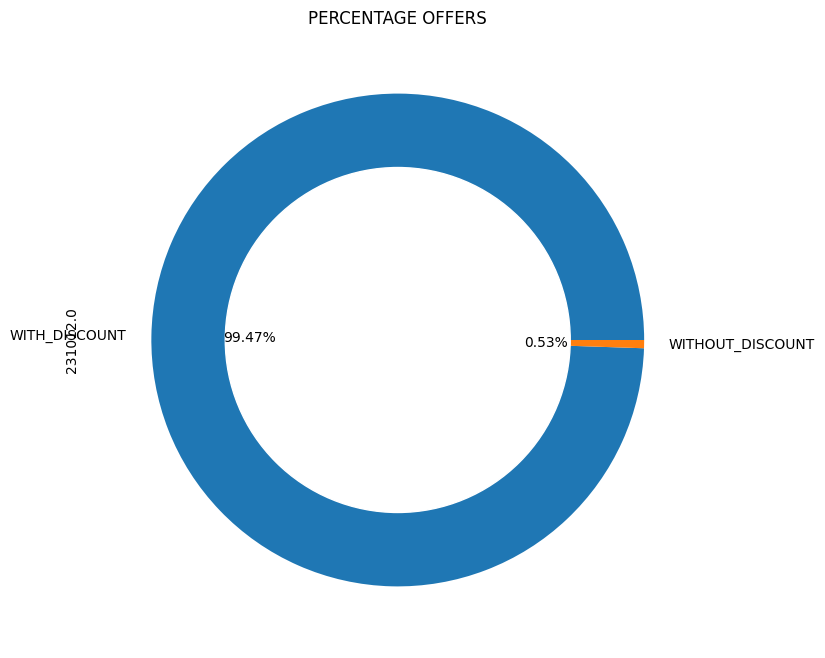

In [49]:
label=['WITH_DISCOUNT','WITHOUT_DISCOUNT']
plt.figure(figsize=(8,8))
data = discount_df.groupby(['DATE_DOWNLOAD'])["WITH_DISCOUNT"].value_counts()
# label=data.index[0][1],data.index[1][1]

my_circle=plt.Circle( (0,0),
                     0.7, color='white')
plt.pie(data.values,
        labels=label,
        autopct='%1.2f%%')

plt.title("PERCENTAGE OFFERS")
plt.ylabel(data.index[0][0])
p=plt.gcf()
p.gca().add_artist(my_circle);

Vamos a probar otro tipo de gráfico ya que en un futuro queremos realizar evaluaciones de diferentes fechas, para ello hemos pensado en un barplot.

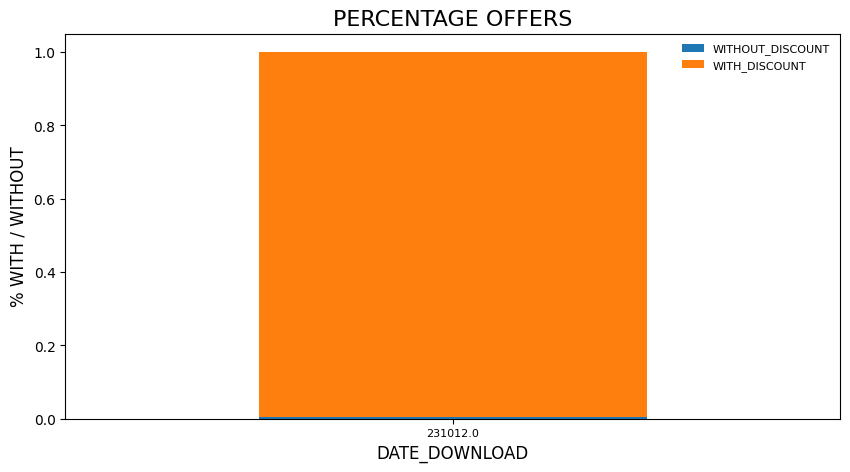

In [89]:
data = discount_df.groupby('DATE_DOWNLOAD')['WITH_DISCOUNT'].value_counts(normalize=True).unstack().fillna(0)         # Realizamos una pequeña modificación para adecuarla visualizacióon de los datos.

ax = data.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title("PERCENTAGE OFFERS", fontsize=16)
plt.xlabel("DATE_DOWNLOAD",fontsize=12)
plt.ylabel("% WITH / WITHOUT",fontsize=12)
plt.xticks(rotation=0,fontsize=8)
ax.legend(['WITHOUT_DISCOUNT', 'WITH_DISCOUNT'], loc='upper right',frameon=False,fontsize=8);

El código para extraer la información y mostrarla directamente puede quedar del siguiente modo:

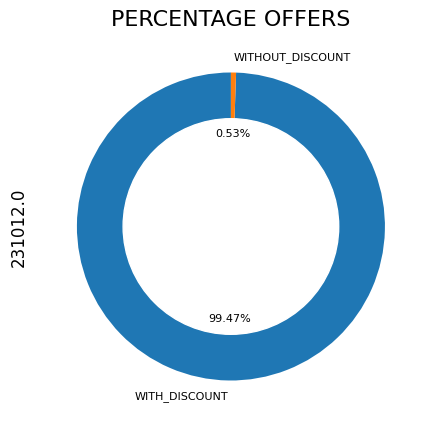

In [17]:
plt.figure(figsize=(10,5))
plt.title("PERCENTAGE OFFERS", fontsize=16)

label=['WITH_DISCOUNT','WITHOUT_DISCOUNT']                                  # Definimos los nombres de las labels

'''Definimos un pieplot en blanco para dejar solo una circunferencia de la estrechez indicada'''
e=0.7
my_circle=plt.Circle( (0,0), e, color='white')            

query='''SELECT PRODUCT.PRODUCT AS NAME, DATE_DOWNLOAD, REGULAR_PRICE,
[DISCOUNT_PRICE]-[REGULAR_PRICE] AS DISCOUNT,
ABS([DISCOUNT_PRICE]-[REGULAR_PRICE])/[REGULAR_PRICE]*100 as PERCENTUAL_DISCOUNT,
CASE WHEN [DISCOUNT_PRICE] = [REGULAR_PRICE] THEN 0 ELSE 1 END AS WITH_DISCOUNT
FROM PRICES  JOIN PRODUCT ON PRODUCT.ID=PRICES.ID_PRODUCT
ORDER BY DISCOUNT DESC'''                                                        # Realizamos esta ordenación para verificar que no hay un producto que haya subido el precio
discount_df=f.sql_query(query,cursor)

data = discount_df.groupby(['DATE_DOWNLOAD'])["WITH_DISCOUNT"].value_counts()

plt.pie(data.values,
        labels=label,
        autopct='%1.2f%%',
        textprops={'fontsize': 8},
        startangle=90, counterclock=True)

plt.ylabel(data.index[0][0],fontsize=12)
plt.yticks()
plt.xticks(rotation=90)
p=plt.gcf()
p.gca().add_artist(my_circle)
file=str('\Resources\image\Percentage_offers')
folder+file
plt.savefig(folder+file);

Como resultado de esta visualización podemos considerar que prácticamente **todos los productos** que ofrecen en la página web tienen un precio rebajado.
Habrá que ver después cuanto es el descuento para saber si es puramente testimonial o si tienen descuentos atractivos. 

Los productos que no tienen descuento son:

In [97]:
print("Los productos que no tienen descuentos son:", len(discount_df[discount_df['WITH_DISCOUNT']==0]),"\ny están representados en la siguiente tabla")
discount_df[discount_df['WITH_DISCOUNT']==0]

Los productos que no tienen descuentos son: 3 
y están representados en la siguiente tabla


,NAME,DATE_DOWNLOAD,REGULAR_PRICE,DISCOUNT,PERCENTUAL_DISCOUNT,WITH_DISCOUNT
0,Bacanal FORTE TARRO 200ml,231012.0,24.99,0.0,0.0,0
1,Desliz! de silicona 100ml,231012.0,19.99,0.0,0.0,0
2,Pilas para tu TOK1,231012.0,2.50,0.0,0.0,0


En esta tabla podemos observar que los productos corresponden a productos catalogados con **AMENITIES**.

#### Porcentaje de descuentos en los productos.

Ahora vamos a valorar qué descuentos ofrecen en la página web.

In [6]:
query='''SELECT PRODUCT.PRODUCT AS NAME, DATE_DOWNLOAD, REGULAR_PRICE, DISCOUNT_PRICE,
[DISCOUNT_PRICE]-[REGULAR_PRICE] AS DISCOUNT,
ABS([DISCOUNT_PRICE]-[REGULAR_PRICE])/[REGULAR_PRICE]*100 as PERCENTUAL_DISCOUNT,
CASE WHEN [DISCOUNT_PRICE] = [REGULAR_PRICE] THEN 0 ELSE 1 END AS WITH_DISCOUNT
FROM PRICES  JOIN PRODUCT ON PRODUCT.ID=PRICES.ID_PRODUCT
ORDER BY PERCENTUAL_DISCOUNT DESC'''                                           # Realizamos esta ordenación para verificar que no hay un producto que haya subido el precio
discount_df=f.sql_query(query,cursor)
discount_df.head()

,NAME,DATE_DOWNLOAD,REGULAR_PRICE,DISCOUNT_PRICE,DISCOUNT,PERCENTUAL_DISCOUNT,WITH_DISCOUNT
0,ROSAL,231012.0,24.99,2.99,-22.0,88.035214,1
1,Bolsa algodón ORGASMELIA SINGULARIS,231012.0,14.99,1.99,-13.0,86.724483,1
2,Bolsa algodón PLACERELLA PHELLATIUM,231012.0,14.99,1.99,-13.0,86.724483,1
3,DIAMOND,231012.0,29.99,4.99,-25.0,83.361120,1
4,Jaula de Castidad Masculina LIGERA,231012.0,79.99,14.99,-65.0,81.260158,1


In [4]:
discount_df.tail()

,NAME,DATE_DOWNLOAD,REGULAR_PRICE,DISCOUNT_PRICE,DISCOUNT,PERCENTUAL_DISCOUNT,WITH_DISCOUNT
556,Desliz! Eco Mandarina,231012.0,14.99,13.99,-1.0,6.671114,1
557,Desliz! Eco Fresa,231012.0,14.99,13.99,-1.0,6.671114,1
558,Bacanal FORTE TARRO 200ml,231012.0,24.99,24.99,0.0,0.000000,0
559,Desliz! de silicona 100ml,231012.0,19.99,19.99,0.0,0.000000,0
560,Pilas para tu TOK1,231012.0,2.50,2.50,0.0,0.000000,0


Vamos a ver que características estadísticas tiene esta columna

In [14]:
discount_df['PERCENTUAL_DISCOUNT'].describe()

count    561.000000
mean      50.001493
std       14.703572
min        0.000000
25%       41.670139
50%       50.016672
75%       60.024010
max       88.035214
Name: PERCENTUAL_DISCOUNT, dtype: float64

Vamos a evaluar cuantos valores unicos tienen los descuentos, porque seguramente hagamos algún tipo de ajuste en los datos para reducirlo.

In [6]:
discount_df['PERCENTUAL_DISCOUNT'].value_counts(ascending=True)

88.035214     1
50.918349     1
52.010402     1
52.196607     1
52.972337     1
             ..
60.040027    11
50.008335    13
50.016672    13
50.010002    14
50.025013    21
Name: PERCENTUAL_DISCOUNT, Length: 216, dtype: int64

Observamos que hay 216 registros en esta tabla para 560 productos.

**Esto es un valor muy alto** y conviene reducirlo, por lo que vamos a dejar solo los valores enteros de los porcentajes.

Para ello vamos a realizar una modificación en la query para tomar solo los valores enteros del porcentaje de descuento.

In [56]:
query='''SELECT PRODUCT.PRODUCT AS NAME, DATE_DOWNLOAD, REGULAR_PRICE, DISCOUNT_PRICE,
[DISCOUNT_PRICE]-[REGULAR_PRICE] AS DISCOUNT,
CAST(ABS([DISCOUNT_PRICE] - [REGULAR_PRICE]) / [REGULAR_PRICE] * 100 AS INT) AS PERCENTUAL_DISCOUNT
FROM PRICES  JOIN PRODUCT ON PRODUCT.ID=PRICES.ID_PRODUCT
ORDER BY PERCENTUAL_DISCOUNT DESC'''                                           # Realizamos esta ordenación para verificar que no hay un producto que haya subido el precio
discount_df=f.sql_query(query,cursor)
print("El nuevo número de registros es",len(discount_df['PERCENTUAL_DISCOUNT'].value_counts()),"\ny los valores quedan del modo siguiente")
discount_df['PERCENTUAL_DISCOUNT'].value_counts(ascending=True)

El nuevo número de registros es 63 
y los valores quedan del modo siguiente


88     1
39     1
59     1
31     1
49     1
      ..
33    22
55    31
40    31
60    49
50    98
Name: PERCENTUAL_DISCOUNT, Length: 63, dtype: int64

Si volvemos a realizar el estudio estadístico vemos que tampoco hay mucha diferencia con lo visto anteriormente.

La distancia intercuartílica se situa entre un 40% - 60 % de descuento y la media y la desviación estandard apenas han sufrido cambios.

In [57]:
discount_df['PERCENTUAL_DISCOUNT'].describe()

count    561.000000
mean      49.743316
std       14.712424
min        0.000000
25%       41.000000
50%       50.000000
75%       60.000000
max       88.000000
Name: PERCENTUAL_DISCOUNT, dtype: float64

El valor por debajo del cual el descuento se consideraría outlier sería: 14.16


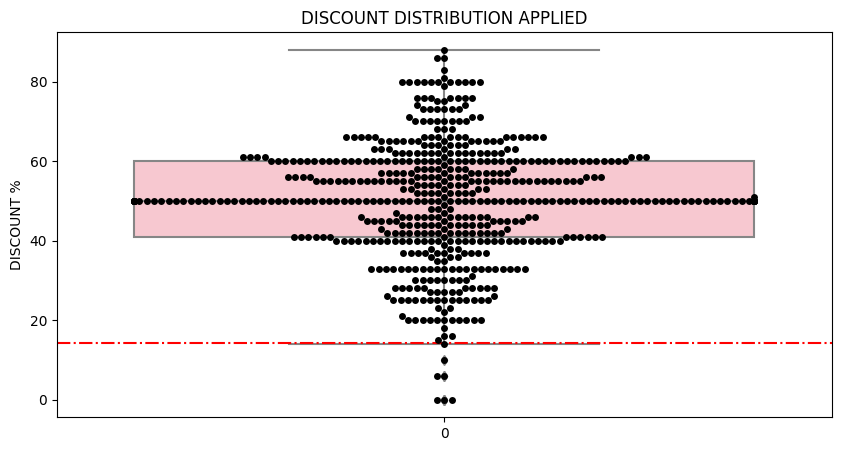

In [62]:
plt.figure(figsize=(10,5))
plt.title("DISCOUNT DISTRIBUTION APPLIED")
plt.ylabel("DISCOUNT %")
plt.xlabel("")

query='''SELECT PRODUCT.PRODUCT AS NAME, DATE_DOWNLOAD, REGULAR_PRICE, DISCOUNT_PRICE,
[DISCOUNT_PRICE]-[REGULAR_PRICE] AS DISCOUNT,
CAST(ABS([DISCOUNT_PRICE] - [REGULAR_PRICE]) / [REGULAR_PRICE] * 100 AS INT) AS PERCENTUAL_DISCOUNT
FROM PRICES  JOIN PRODUCT ON PRODUCT.ID=PRICES.ID_PRODUCT
ORDER BY PERCENTUAL_DISCOUNT DESC'''                                           

sns.boxplot(data=f.sql_query(query,cursor)['PERCENTUAL_DISCOUNT'],color="pink")
sns.swarmplot(f.sql_query(query,cursor)['PERCENTUAL_DISCOUNT'],color='black')

'''Definiendo el outlier inferior'''
outlier_1 = np.percentile(f.sql_query(query,cursor)['PERCENTUAL_DISCOUNT'], 1.1)        # Los valores que se pueden considerar outliers son 1,1% 
plt.axhline(y=outlier_1, xmin=0, xmax=1,color='r', linewidth= 1.5,linestyle="-.")
print("El valor por debajo del cual el descuento se consideraría outlier sería:",outlier_1)
file=str('\Resources\image\discount_distribution')
folder+file
plt.savefig(folder+file);


Vamos a ver qué productos son outlier 

In [79]:
query='''SELECT PRODUCT.PRODUCT AS NAME, REGULAR_PRICE, DISCOUNT_PRICE,
CAST(ABS([DISCOUNT_PRICE] - [REGULAR_PRICE]) / [REGULAR_PRICE] * 100 AS INT) AS PERCENTUAL_DISCOUNT
FROM PRICES  JOIN PRODUCT ON PRODUCT.ID=PRICES.ID_PRODUCT
WHERE PERCENTUAL_DISCOUNT<14.16''' 
f.sql_query(query,cursor)

,NAME,REGULAR_PRICE,DISCOUNT_PRICE,PERCENTUAL_DISCOUNT
0,Bacanal FORTE TARRO 200ml,24.99,24.99,0
1,Desliz! Eco Mandarina,14.99,13.99,6
2,La Bocca de la Veritá,99.99,89.99,10
3,ORGASMELIA DUALIS,69.99,59.99,14
4,Desliz! de silicona 100ml,19.99,19.99,0
5,Desliz! Eco Fresa,14.99,13.99,6
6,Pilas para tu TOK1,2.50,2.50,0


In [77]:
query='''SELECT PRODUCT.PRODUCT AS NAME, DATE_DOWNLOAD, REGULAR_PRICE, DISCOUNT_PRICE,
CAST(ABS([DISCOUNT_PRICE] - [REGULAR_PRICE]) / [REGULAR_PRICE] * 100 AS INT) AS PERCENTUAL_DISCOUNT
FROM PRICES  JOIN PRODUCT ON PRODUCT.ID=PRICES.ID_PRODUCT
WHERE PERCENTUAL_DISCOUNT<14.16''' 
print("El número de outliers que representan productos que apenas han tenido un descuento son",len(f.sql_query(query,cursor)),"\nlo que representa un porcentaje de",round(len(f.sql_query(query,cursor))/len(discount_df)*100,2),"% de los productos")


El número de outliers que representan productos que apenas han tenido un descuento son 7 
lo que representa un porcentaje de 1.25 % de los productos


#### Distribución de precios.

Dado que prácticamente todos los productos tienen descuentos vamos a realizar también un estudio de como están distribuidos los precios dentro de diversos rangos.

Para esto vamos a dejar los precios en unidades de decimales y realizaremos un estudio similar al anterior con estos datos.

In [3]:
query='''SELECT PRODUCT.PRODUCT AS NAME, DATE_DOWNLOAD, CAST(DISCOUNT_PRICE/10 AS INT)*10 as abs_price
FROM PRICES JOIN PRODUCT ON PRODUCT.ID=PRICES.ID_PRODUCT
ORDER BY DISCOUNT_PRICE DESC'''                                
abs_price_df=f.sql_query(query,cursor)

abs_price_df.head()

,NAME,DATE_DOWNLOAD,abs_price
0,SUEGNA,231012.0,340
1,SESSE 360 BLACK,231012.0,340
2,MEGACULO 18KG de placer,231012.0,290
3,MUERDE,231012.0,250
4,Columpio sexual giratorio con estructura de am...,231012.0,240


In [36]:
abs_price_df['abs_price'].describe()

count    561.000000
mean      21.354724
std       32.704587
min        0.000000
25%        0.000000
50%       10.000000
75%       30.000000
max      340.000000
Name: abs_price, dtype: float64

Podemos observar que los precios se situan entre las decennas de 0 y 30 principalmente. Además la media se situa por encima  del percentil 75.

C:\Users\Javier\AppData\Local\Temp\ipykernel_10144\1018859317.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(abs_price_df['abs_price'],bins=50,color="teal");


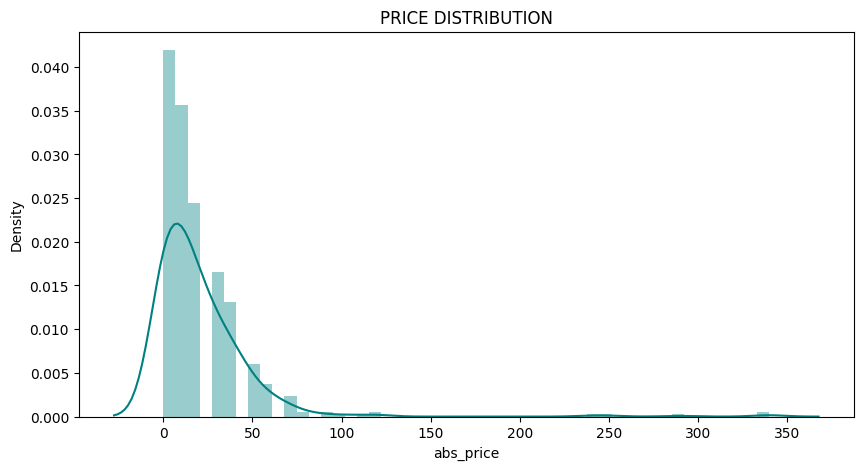

In [46]:
plt.figure(figsize=(10,5))
plt.title("PRICE DISTRIBUTION")
plt.xlabel("PRICE")
sns.distplot(abs_price_df['abs_price'],bins=50,color="teal");

In [51]:
abs_price_df['abs_price'].value_counts(ascending=False)

0      160
10     136
20      93
30      63
40      50
50      23
60      14
70       9
340      2
90       2
120      2
80       2
290      1
100      1
110      1
240      1
250      1
Name: abs_price, dtype: int64

Podemos ver en esta información que los precios están habitualmente por debajo de 80 € y solo en casos puntuales están por encima de 200 €.

Además como se veía en la gráfica anterior los precios no suelen sobrepasar los 30 €.

In [68]:
query_1='''SELECT PRODUCT.PRODUCT AS NAME, CAST(DISCOUNT_PRICE/10 AS INT)*10 as abs_price
FROM PRICES JOIN PRODUCT ON PRODUCT.ID=PRICES.ID_PRODUCT
where abs_price>30
ORDER BY DISCOUNT_PRICE DESC'''                                
upper_abs_price_df_1=f.sql_query(query_1,cursor)
upper_abs_price_df_1

query_2='''SELECT PRODUCT.PRODUCT AS NAME, CAST(DISCOUNT_PRICE/10 AS INT)*10 as abs_price
FROM PRICES JOIN PRODUCT ON PRODUCT.ID=PRICES.ID_PRODUCT
where abs_price>90
ORDER BY DISCOUNT_PRICE DESC'''                                
upper_abs_price_df_2=f.sql_query(query_2,cursor)

print("El porcentaje de los productos que se encuentran por encima de 30 € es",round(len(upper_abs_price_df_1)/len(abs_price_df),4)*100,"%\nmientras que el porcentaje de producto que se encuentran por encima de 100 € es",round(len(upper_abs_price_df_2)/len(abs_price_df),4)*100,"%")

El porcentaje de los productos que se encuentran por encima de 30 € es 19.43 %
mientras que el porcentaje de producto que se encuentran por encima de 100 € es 1.6 %


Por todo ello llegamos a la **conclusión** que de los productos que se venden en la pagina web solo el 20 % supera los 30 € y unicamente el 1,6 % supera los 100 €.

Pero... ¿la distribución de los precios sin rebajar es el mismo?

Vamos a comprobarlo.

C:\Users\Javier\AppData\Local\Temp\ipykernel_2320\917027612.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(abs_price_df['abs_price'],bins=50,color="teal");


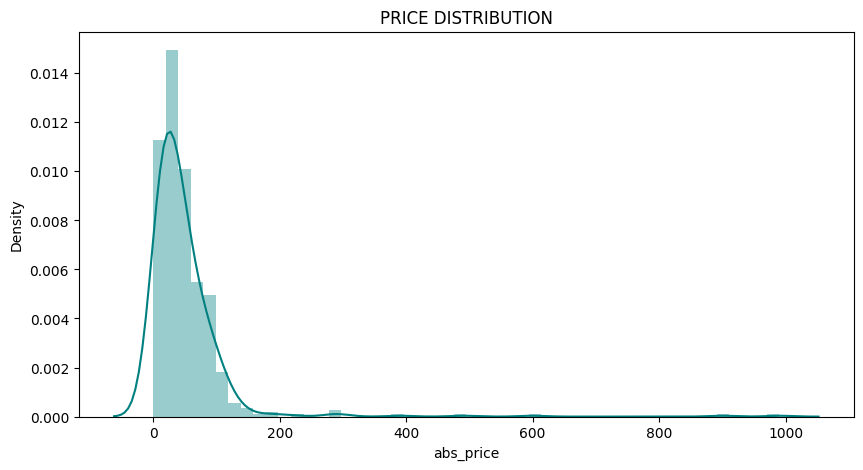

In [21]:
query='''SELECT PRODUCT.PRODUCT AS NAME, CAST(REGULAR_PRICE/10 AS INT)*10 as abs_price
FROM PRICES JOIN PRODUCT ON PRODUCT.ID=PRICES.ID_PRODUCT
ORDER BY REGULAR_PRICE DESC'''                                
abs_price_df=f.sql_query(query,cursor)

plt.figure(figsize=(10,5))
plt.title("PRICE DISTRIBUTION")
plt.xlabel("PRICE")
sns.distplot(abs_price_df['abs_price'],bins=50,color="teal");

In [8]:
abs_price_df['abs_price'].describe()

count    561.000000
mean      48.484848
std       73.487270
min        0.000000
25%       20.000000
50%       30.000000
75%       60.000000
max      990.000000
Name: abs_price, dtype: float64

En comparación con la distribución de los precios, podemos ver que tanto la mediana como la media tienen valores más altos que los precios rebajados.

A su vez los precios son muy superiores a los rebajados.

In [7]:
abs_price_df['abs_price'].value_counts(ascending=False)

10     117
20     106
40      61
30      60
50      51
60      38
90      36
70      23
80      19
110     17
0        8
120      5
140      4
100      3
290      3
190      2
900      1
130      1
170      1
220      1
390      1
490      1
600      1
990      1
Name: abs_price, dtype: int64

Vamos a representar las dos gráficas conjuntamente para ver su comportamiento.

C:\Users\Javier\AppData\Local\Temp\ipykernel_2320\504914567.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(abs_disc_price_df['abs_price'],bins=50,color="teal", ax=axes[0])
C:\Users\Javier\AppData\Local\Temp\ipykernel_2320\504914567.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(abs_r

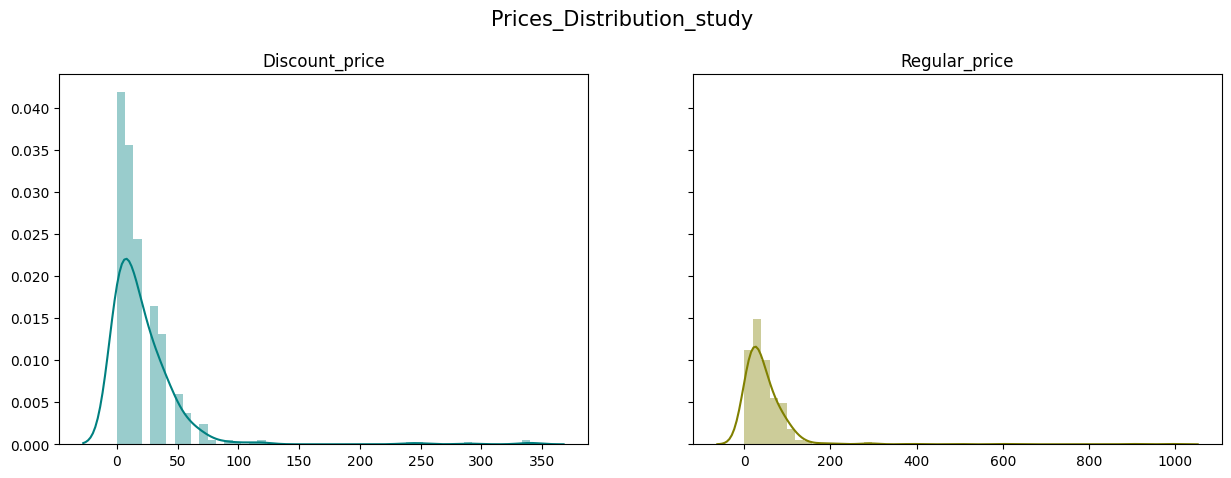

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(15,5), sharey=True)
axes[0].set_position([0,1.5,0.5,0.300])
axes[1].set_position([0.5,1.5,0.2,0.300])
# axes[2].set_position([1.5,1.5,0.2,0.300])

label=["Discount_price","Regular_price"]

'''PLOT 0'''

query_1='''SELECT PRODUCT.PRODUCT AS NAME,CAST(DISCOUNT_PRICE/10 AS INT)*10 as abs_price
FROM PRICES JOIN PRODUCT ON PRODUCT.ID=PRICES.ID_PRODUCT
'''                                
abs_disc_price_df=f.sql_query(query_1,cursor)
sns.distplot(abs_disc_price_df['abs_price'],bins=50,color="teal", ax=axes[0])


'''PLOT 1'''


query_2='''SELECT PRODUCT.PRODUCT AS NAME, CAST(REGULAR_PRICE/10 AS INT)*10 as abs_price
FROM PRICES JOIN PRODUCT ON PRODUCT.ID=PRICES.ID_PRODUCT'''                                
abs_reg_price_df=f.sql_query(query_2,cursor)
sns.distplot(abs_reg_price_df['abs_price'],bins=50,color="olive", ax=axes[1])

for i in range (0,2):
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')
    axes[i].set_title(label[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), fontsize=10)

fig.suptitle("Prices_Distribution_study",fontsize=15)
fig.tight_layout() 
file=str('\Resources\image\Prices_Distribution_study.png')
folder+file
fig.subplots_adjust(top=0.85)
plt.savefig(folder+file);


Podemos observar en esta distribución como los precios rebajados se encuentran más uniformes y compacto que los precios sin rebajar.

Así mismo, observamos que el número de casos es mayor en los precios rebajados que sin rebajar y, como consecuencia de ello, la distribución de los precios sin rebajar es mayor, alargando el precio hacia importes en torno a 1000 -1100 €.

In [31]:
abs_disc_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   NAME       561 non-null    object
 1   abs_price  561 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.9+ KB


### b. Comentarios.

#### Estudio sobre las fechas de los comentarios que se realizan.

Definimos qué queries son para cada uno de los posibles componentes que componen la fecha.

Las queries extraen los datos en forma de texto por lo que hay que cambiar el formato a *int* y en el caso de los días de la semana hay que realizar además un mapeo para asignar el día de la semana que corresponde teniendo en cuenta que los días de la semanas están definidos en formato inglés por lo que 0 corresponde a domingo.

In [ ]:
# query='''select ID_USERS, date(DATE) as FECHA from COMMENT  WHERE DATE LIKE '2023%' ORDER BY DATE ASC LIMIT (10)'''
# query='''select ID_USERS, date(DATE) as FECHA from COMMENT WHERE DATE BETWEEN '%-01-%' AND '%-02-%' ORDER BY DATE ASC LIMIT (10)'''
# query='''select ID_USERS, strftime ('%Y',DATE) as YEAR from COMMENT ORDER BY DATE ASC LIMIT (10)'''              # Extraer ano
# query='''select ID_USERS, strftime ('%m',DATE) as MONTH from COMMENT ORDER BY DATE ASC LIMIT (10)'''             # Extraer mes
# query='''select ID_USERS, strftime ('%d',DATE) as DAY from COMMENT ORDER BY DATE ASC LIMIT (10)'''               # Extraer dia
# query='''select ID_USERS, strftime ('%w',DATE) as DAY_WEEK from COMMENT ORDER BY DATE ASC LIMIT (10)'''          # Extraer dia_semana, donde 0 es domingo
# query='''select ID_USERS, DATE from COMMENT ORDER BY DATE ASC LIMIT (10)'''                                      # Extraer dia_semana, agregando 1 valor para que sea de 1 a 7

# variable=f.sql_query(query,cursor)
# variable.iloc[:,1]=variable.iloc[:,1].astype(int)
# variable.info()
         


In [14]:
variable.head()

,ID_USERS,DAY_WEEK
0,1879,2
1,270,2
2,1878,5
3,754,1
4,753,6


En el caso que la query extraiga el día de la semana.

In [10]:
dicc_dia={0:"domingo",1:"lunes",2:"martes",3:"miercoles",4:"jueves",5:"viernes",6:"sabado"}
# variable['DAY_WEEK']=variable['DAY_WEEK'].map(dicc_dia)
# variable

In [18]:
query='''select count (COMMENT) AS COMENTARIOS, strftime ('%Y',DATE) as YEAR from COMMENT GROUP BY YEAR ORDER BY DATE ASC'''
total=f.sql_query(query,cursor)
total.iloc[:,1]=total.iloc[:,1].astype(int)
total

C:\Users\Javier\AppData\Local\Temp\ipykernel_3180\1043526812.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  total.iloc[:,1]=total.iloc[:,1].astype(int)


,COMENTARIOS,YEAR
0,1,2005
1,3,2007
2,88,2008
3,129,2009
4,168,2010
5,166,2011
6,264,2012
7,668,2013
8,921,2014
9,1091,2015


Podemos observar que en el año 2006 no había datos, esto es muy probable porque la tienda empezaría a funcionar en el 2005 y de ahí que los primeros años, los comentarios no existieran o fueran muy pocos.

In [19]:
total.loc[len(total)] = [0,2006]
total


,COMENTARIOS,YEAR
0,1,2005
1,3,2007
2,88,2008
3,129,2009
4,168,2010
5,166,2011
6,264,2012
7,668,2013
8,921,2014
9,1091,2015


C:\Users\Javier\AppData\Local\Temp\ipykernel_3180\1809138985.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  total.iloc[:,1]=total.iloc[:,1].astype(int)


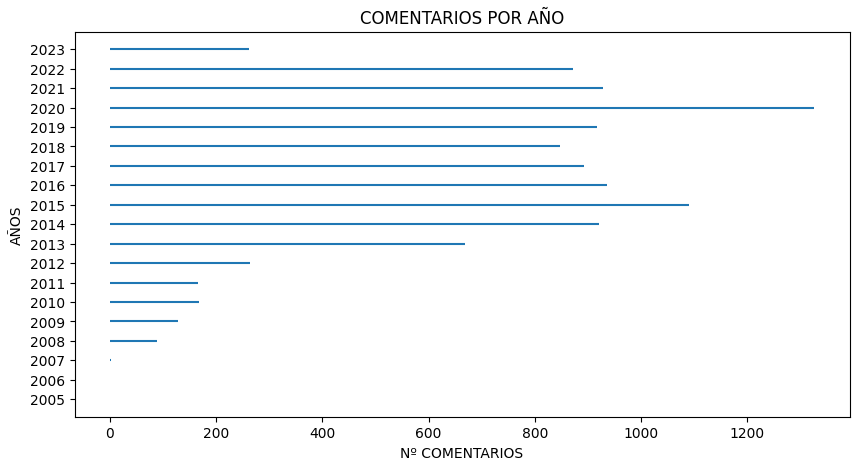

In [23]:
plt.figure(figsize=(10,5))
query='''select count (COMMENT) AS COMENTARIOS, strftime ('%Y',DATE) as YEAR from COMMENT GROUP BY YEAR'''
total=f.sql_query(query,cursor)
total.loc[len(total)] = [0,2006]
total.iloc[:,1]=total.iloc[:,1].astype(int)
plt.hlines(total['YEAR'],xmin=0,
           xmax=total['COMENTARIOS'],)
plt.yticks(total['YEAR'])
plt.xlabel("Nº COMENTARIOS")
plt.ylabel("AÑOS")
plt.title("COMENTARIOS POR AÑO")

file=str('\Resources\image\Comments_per_year')
folder+file
plt.savefig(folder+file);

C:\Users\Javier\AppData\Local\Temp\ipykernel_3180\1671394272.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  total.iloc[:,1]=total.iloc[:,1].astype(int)


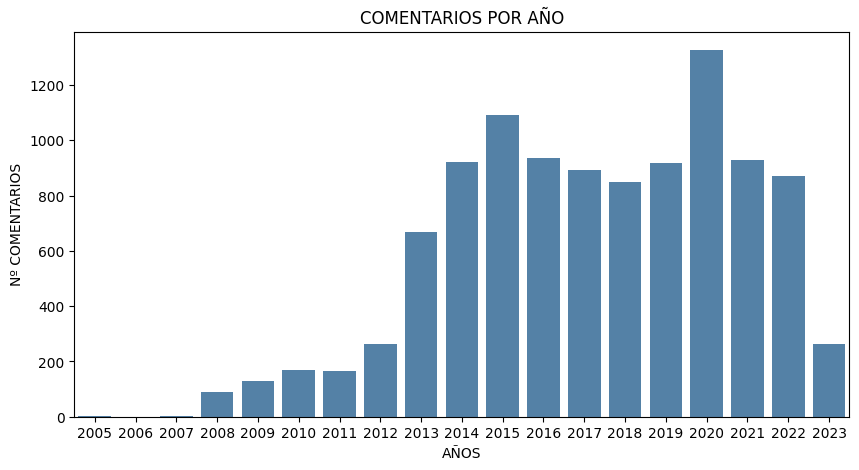

In [24]:
plt.figure(figsize=(10,5))
query='''select count (COMMENT) AS COMENTARIOS, strftime ('%Y',DATE) as YEAR from COMMENT GROUP BY YEAR'''
total=f.sql_query(query,cursor)
total.loc[len(total)] = [0,2006]
total.iloc[:,1]=total.iloc[:,1].astype(int)
sns.barplot(x=total['YEAR'],y=total['COMENTARIOS'],color="steelblue")
plt.ylabel("Nº COMENTARIOS")
plt.xlabel("AÑOS")
plt.title("COMENTARIOS POR AÑO")
file=str('\Resources\image\Comments_per_year_2')
folder+file
plt.savefig(folder+file);

In [25]:
query='''select count (COMMENT) AS COMENTARIOS, strftime ('%m',DATE) as MONTH from COMMENT GROUP BY MONTH'''   
total=f.sql_query(query,cursor)
total.iloc[:,1]=total.iloc[:,1].astype(int)
total

C:\Users\Javier\AppData\Local\Temp\ipykernel_3180\388559175.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  total.iloc[:,1]=total.iloc[:,1].astype(int)


,COMENTARIOS,MONTH
0,1035,1
1,922,2
2,791,3
3,763,4
4,774,5
5,662,6
6,854,7
7,958,8
8,1051,9
9,753,10


C:\Users\Javier\AppData\Local\Temp\ipykernel_3180\533552165.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  total.iloc[:,1]=total.iloc[:,1].astype(int)


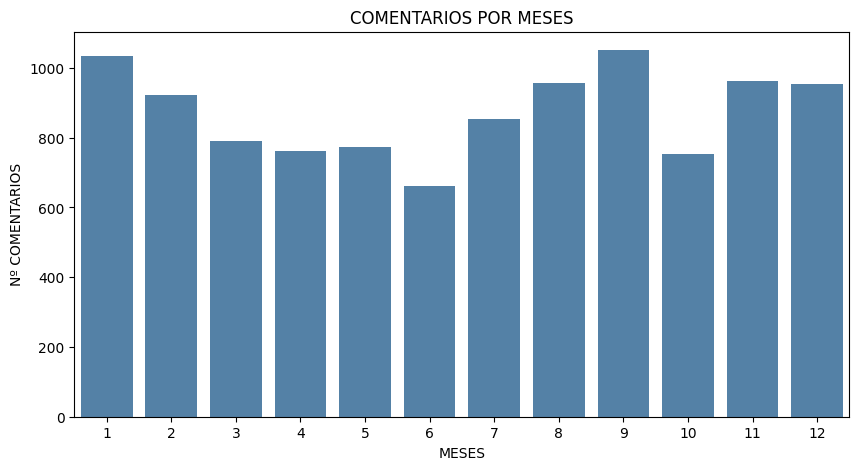

In [26]:
plt.figure(figsize=(10,5))
query='''select count (COMMENT) AS COMENTARIOS, strftime ('%m',DATE) as MONTH from COMMENT GROUP BY MONTH'''   
total=f.sql_query(query,cursor)
total.iloc[:,1]=total.iloc[:,1].astype(int)
sns.barplot(x=total['MONTH'],y=total['COMENTARIOS'],color="steelblue")
plt.ylabel("Nº COMENTARIOS")
plt.xlabel("MESES")
plt.title("COMENTARIOS POR MESES")
file=str('\Resources\image\Comments_per_month')
folder+file
plt.savefig(folder+file);

Se observa mucha estabilidad en los datos según los meses, siendo los picos en enero (coincidiendo con Reyes) y en Septiembre (coincidiendo con la vuelta en la mayoría de los casos de las vacaciones).

El tema de las vacaciones puede ser algo interesante de evaluar en el sentido de si los usuarios tienen pareja con niños o si realizan sus compras durante los meses estivales anteriores y comentan a la vuelta.

In [27]:
query='''select count (COMMENT) AS COMENTARIOS, strftime ('%w',DATE) as DAY_WEEK from COMMENT GROUP BY DAY_WEEK'''   
total=f.sql_query(query,cursor)
total.iloc[:,1]=total.iloc[:,1].astype(int)
total['DAY_WEEK']=total['DAY_WEEK'].map(dicc_dia)
total

C:\Users\Javier\AppData\Local\Temp\ipykernel_3180\1783956544.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  total.iloc[:,1]=total.iloc[:,1].astype(int)


,COMENTARIOS,DAY_WEEK
0,987,domingo
1,1690,lunes
2,1763,martes
3,1795,miercoles
4,1752,jueves
5,1465,viernes
6,1027,sabado


C:\Users\Javier\AppData\Local\Temp\ipykernel_3180\823842860.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  total.iloc[:,1]=total.iloc[:,1].astype(int)


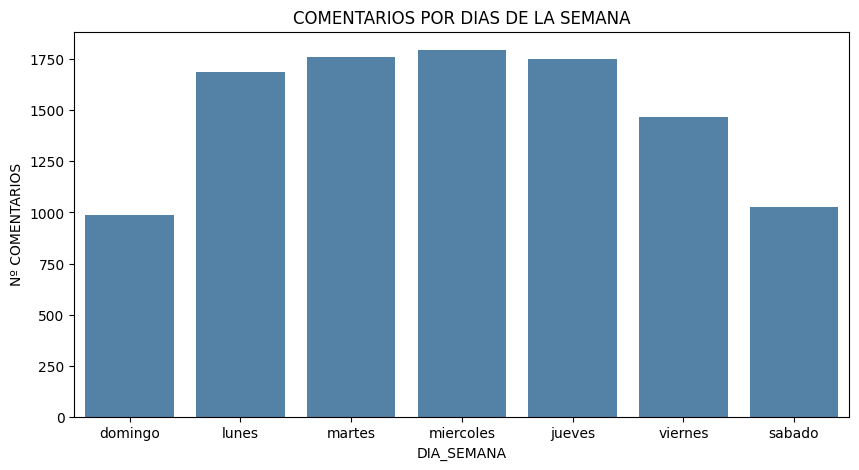

In [28]:
plt.figure(figsize=(10,5))
query='''select count (COMMENT) AS COMENTARIOS, strftime ('%w',DATE) as DAY_WEEK from COMMENT GROUP BY DAY_WEEK'''   
total=f.sql_query(query,cursor)
total.iloc[:,1]=total.iloc[:,1].astype(int)
total['DAY_WEEK']=total['DAY_WEEK'].map(dicc_dia)
sns.barplot(x=total['DAY_WEEK'],y=total['COMENTARIOS'],color="steelblue")
plt.ylabel("Nº COMENTARIOS")
plt.xlabel("DIA_SEMANA")
plt.title("COMENTARIOS POR DIAS DE LA SEMANA")
file=str('\Resources\image\Comments_per_dayofweek')
folder+file
plt.savefig(folder+file);

Se observa que los días de la semana con menores comentarios sean los días del fin de semana y en general se agrupan en los días entre semana.

Esto puede ser porque al comercializar un producto de ocio, esté se compre y se comente fuera del fin de semana, que es cuando más podría ser utilizado al no ser productos de consumo inmediato.

Vamos a juntar las 3 gráficas en subplots.
Aquí agregaremos colores en las paletas para incidir en los datos máximos y mínimos.

C:\Users\Javier\AppData\Local\Temp\ipykernel_2320\1663279954.py:13: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  total.iloc[:,1]=total.iloc[:,1].astype(int)
C:\Users\Javier\AppData\Local\Temp\ipykernel_2320\1663279954.py:20: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  total.iloc[:,1]=total.iloc[:,1].astype(int)
C:\Users\Javier\AppData\Local\Temp\ipykernel_2320\1663279954.py:27: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use 

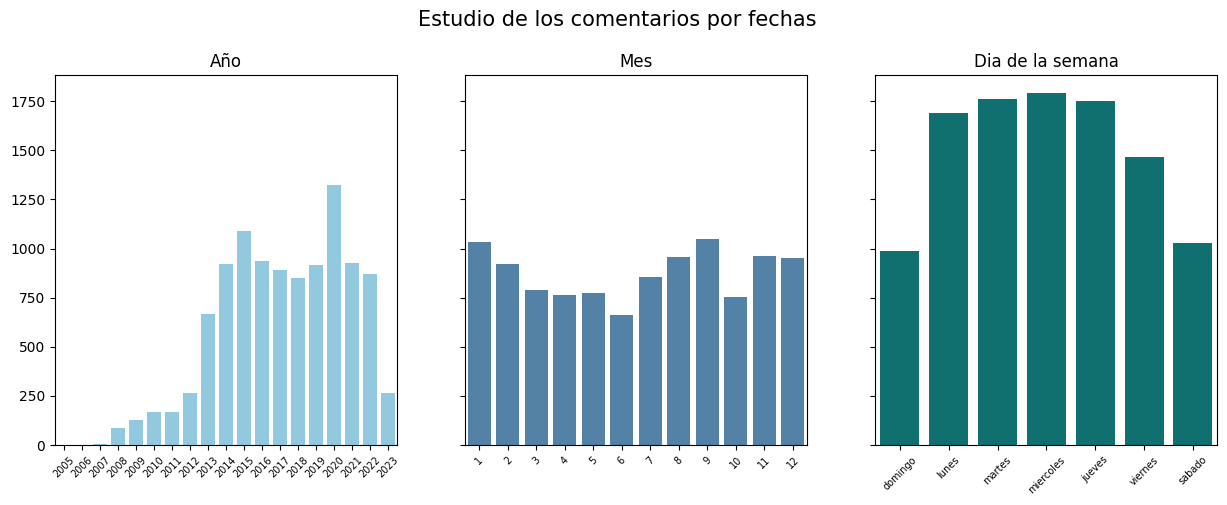

In [74]:
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=True)
axes[0].set_position([0,1.5,0.5,0.300])
axes[1].set_position([0.5,1.5,0.2,0.300])
axes[2].set_position([1.5,1.5,0.2,0.300])

label=["Año","Mes","Dia de la semana"]

'''PLOT 0'''

query='''select count (COMMENT) AS COMENTARIOS, strftime ('%Y',DATE) as YEAR from COMMENT GROUP BY YEAR'''
total=f.sql_query(query,cursor)
total.loc[len(total)] = [0,2006]
total.iloc[:,1]=total.iloc[:,1].astype(int)
sns.barplot(x=total['YEAR'],y=total['COMENTARIOS'],color="skyblue", ax=axes[0])

'''PLOT 1'''

query='''select count (COMMENT) AS COMENTARIOS, strftime ('%m',DATE) as MONTH from COMMENT GROUP BY MONTH'''   
total=f.sql_query(query,cursor)
total.iloc[:,1]=total.iloc[:,1].astype(int)
sns.barplot(x=total['MONTH'],y=total['COMENTARIOS'],color="steelblue", ax=axes[1])

'''PLOT 2'''

query='''select count (COMMENT) AS COMENTARIOS, strftime ('%w',DATE) as DAY_WEEK from COMMENT GROUP BY DAY_WEEK'''   
total=f.sql_query(query,cursor)
total.iloc[:,1]=total.iloc[:,1].astype(int)
total['DAY_WEEK']=total['DAY_WEEK'].map(dicc_dia)
sns.barplot(x=total['DAY_WEEK'],y=total['COMENTARIOS'],color="teal", ax=axes[2])

for i in range (0,3):
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')
    axes[i].set_title(label[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, fontsize=7)

fig.suptitle("Estudio de los comentarios por fechas",fontsize=15)
fig.tight_layout() 
file=str('\Resources\image\Comments_per_date.png')
folder+file
fig.subplots_adjust(top=0.85)
plt.savefig(folder+file);


#### Estudio sobre el ratio de los comentarios que se realizan.

1.- Visualizamos los datos:

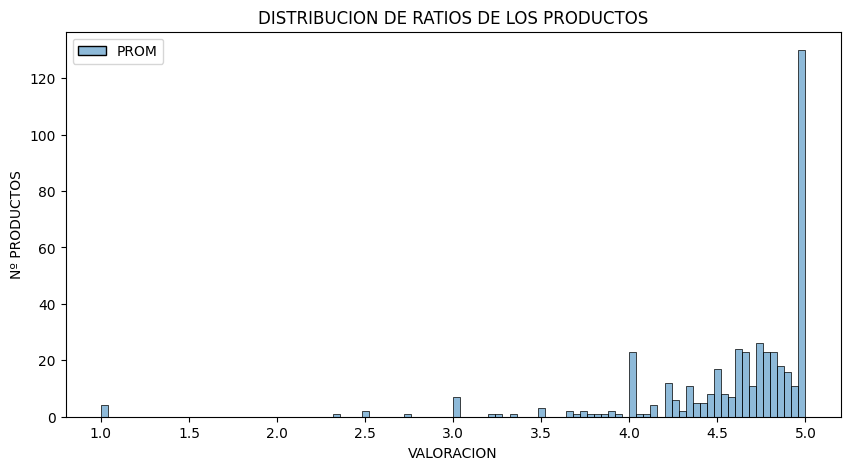

In [29]:
plt.figure(figsize=(10,5))
query='''SELECT PRODUCT,avg(RATIO) as PROM FROM COMMENTS_PER_PRODUCT group BY PRODUCT ORDER BY avg(RATIO) DESC'''
total=f.sql_query(query,cursor)
sns.histplot(data=total,bins=100)
plt.xticks()
plt.ylabel("Nº PRODUCTOS")
plt.xlabel("VALORACION")
plt.title("DISTRIBUCION DE RATIOS DE LOS PRODUCTOS")
file=str(r'\Resources\image\ratios_per_product')
folder+file
plt.savefig(folder+file);

En general se puede observar que los productos se encuentran entre 4.0 y 5.0. 

¿Podemos considerar  los valores por debajo de 4.0 como anómalos? ¿y los valores de 5.0?

Hacemos un *boxplot* para tener una visualización de los datos de la valoración por cuartiles y decidir.

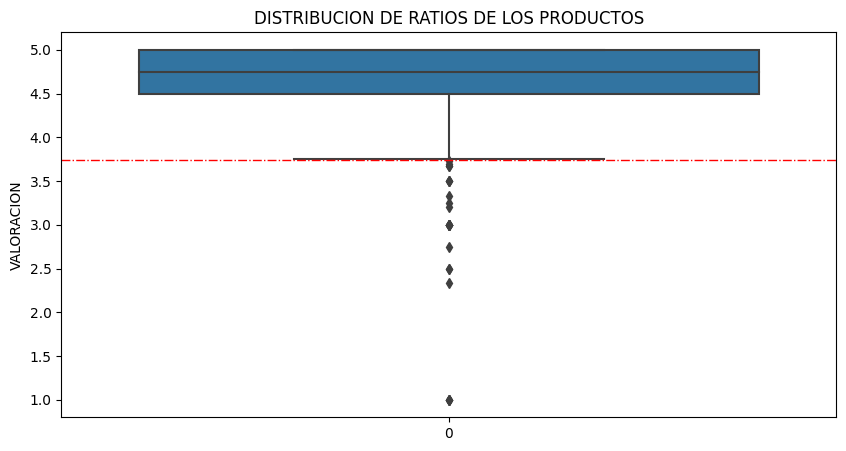

In [30]:
plt.figure(figsize=(10,5))
query='''SELECT PRODUCT,avg(RATIO) as PROM FROM COMMENTS_PER_PRODUCT group BY PRODUCT ORDER BY avg(RATIO) DESC'''
sns.boxplot(data=f.sql_query(query,cursor)['PROM'])
outlier = np.percentile(f.sql_query(query,cursor)['PROM'], 5.5)
plt.axhline(y=outlier, xmin=0, xmax=1,color='r', linewidth= 1,linestyle="-.")
plt.ylabel("VALORACION")
plt.title("DISTRIBUCION DE RATIOS DE LOS PRODUCTOS")
file=str(r'\Resources\image\Outliers_per_product')
folder+file
plt.savefig(folder+file);

2.- Outliers:

Podemos ver claramente  que los valores por debajo de aprox. 3.5 son *outliers*. 

No es habitual que un producto de la tienda tenga valores por debajo de este cantidad.

¿Cuántos productos serían?

In [31]:
query='''SELECT PRODUCT,avg(RATIO) AS PROM FROM COMMENTS_PER_PRODUCT GROUP BY PRODUCT HAVING avg (RATIO)<3.7'''

outlier=f.sql_query(query,cursor)
print("El número de productos que son outliers es:",len(outlier),"\nlo que representa un porcentaje de",round(len(outlier)/len(total)*100,2),"%")


El número de productos que son outliers es: 23 
lo que representa un porcentaje de 5.15 %


3.- Valor máximo de valoración:

¿Cuántos productos tienen una valoración de 5?

In [33]:
query='''SELECT PRODUCT,avg(RATIO) AS PROM FROM COMMENTS_PER_PRODUCT GROUP BY PRODUCT
 having avg (RATIO)=(SELECT max(RATIO) FROM COMMENTS_PER_PRODUCT GROUP BY PRODUCT)'''
maximo=f.sql_query(query,cursor)

print("El número de productos que tienen una valoración máxima es:",len(maximo),"\nlo que representa un porcentaje de",round(len(maximo)/len(total)*100,2),"%")


El número de productos que tienen una valoración máxima es: 129 
lo que representa un porcentaje de 28.86 %


##### Conclusión:

Los productos tienen una valoración promedio que oscila entre 3,7 y 5.0, siendo ésta la valoración máxima posible.

Con la valoración promedio máxima posible hay 129 productos de los 447, lo que representa el 28,86 % de los productos.

También se observa que por debajo de una valoración promedio de 3,7 hay 23 productos, lo que representa un porcentaje 5,15 %.

#### Estudio sobre los usuarios de los comentarios que se realizan.

En este punto hay que tener en cuenta que tenemos pendiente ahora mismo de generar usuarios distintos cuando se encuentran el mismo usuario dentro del mismo producto, ya que no tiene sentido que sea el mismo usuario y hay que discriminarlo. 

Lo mejor en este punto sería tener users por nick y que esté no pudiera ser el mismo, ya que permitiría poder discernir la autoridad de cada comentario. 

In [3]:
query='''SELECT COUNT(COMMENT)AS nº_COMMENTS, USERS.USERS AS USERS
FROM COMMENT 
JOIN USERS
ON COMMENT.ID_USERS=USERS.ID
GROUP BY USERS
ORDER BY nº_COMMENTS DESC
'''

users=f.sql_query(query,cursor)
print("El número de usuarios que han comentado en algún momento un producto es", len(users))

El número de usuarios que han comentado en algún momento un producto es 2021


In [75]:
users

,nº_COMMENTS,USERS
0,105,Miguel
1,92,Ricardo
2,90,David
3,88,Javier
4,83,Laura
...,...,...
2016,1,ALEXANDER_2
2017,1,ALEX
2018,1,AINOA
2019,1,ADRIAN


Podemos observar que hay más de 2000 USERS, distintos que han comentado en algún momento sobre los productos. 


En esta condición es imposible de realizar una visualización de los datos, necesitaríamos algún parámetro más para poder tener una visualización interesante.

Es por ello que vamos a usar otra variable más en este estudio, el año del comentario.

In [11]:
query='''SELECT COUNT(COMMENT)AS nº_COMMENTS, strftime ('%Y',DATE) as YEAR, USERS.USERS AS USERS
FROM COMMENT 
JOIN USERS
ON COMMENT.ID_USERS=USERS.ID
GROUP BY USERS,YEAR
ORDER BY YEAR asc
'''

comments_users_per_year=f.sql_query(query,cursor)
comments_users_per_year = comments_users_per_year.pivot(index='USERS', columns='YEAR', values='nº_COMMENTS')
comments_users_per_year = comments_users_per_year.fillna(0)
comments_users_per_year['TOTAL_COMMENTS'] = comments_users_per_year.sum(axis=1)                                             # Genero una columna con el total de comentarios para poder ordenarlos posteriormente
comments_users_per_year = comments_users_per_year.sort_values(by='TOTAL_COMMENTS', ascending=False)                         # Ordeno el dataframe de modo descendente en función del total de comentarios de los usuarios.
comments_users_per_year

YEAR,2005,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,TOTAL_COMMENTS
USERS,,,,,,,,,,,,,,,,,,,
Miguel,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,6.0,5.0,3.0,2.0,3.0,40.0,33.0,9.0,2.0,105.0
Ricardo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,7.0,3.0,3.0,1.0,74.0,1.0,NaN,NaN,92.0
David,NaN,NaN,NaN,NaN,NaN,3.0,2.0,1.0,5.0,4.0,6.0,6.0,1.0,NaN,19.0,19.0,19.0,5.0,90.0
Javier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,8.0,1.0,9.0,12.0,4.0,13.0,27.0,7.0,88.0
Laura,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,10.0,4.0,3.0,2.0,11.0,11.0,27.0,3.0,8.0,2.0,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pablo_4,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Paco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0
Pakete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [17]:
user_comment_once=comments_users_per_year[comments_users_per_year['TOTAL_COMMENTS']==1]
print("El número de usuarios que han comentado unicamente una vez es",len(user_comment_once), "frente al total de usuarios que han comentado que son", len(comments_users_per_year),"\nlo que representa un total de",round(len(user_comment_once)/len(comments_users_per_year)*100,2),"%")

El número de usuarios que han comentado unicamente una vez es 827 frente al total de usuarios que han comentado que son 2021 
lo que representa un total de 40.92 %


Como podemos observar casi la mitad de los usuarios han comentado unicamente una vez un producto comprado. 

Esto puede significar 2 cosas:

- Los usuarios no comentan los productos que compran.

- Los usuarios han abandonado esta página web tras una compra.

Vamos a ver los primeros 50 usuarios que más han comentado, vamos a separar la información en 2 matrices.

 - La primera con el número de comentarios que han realizado año a año.

 - La segunda con el total de los comentarios que han realizado.

De este modo podemos realizar un *heatmap* con el número de comentarios y saber al a qué corresponden estos comentarios

In [37]:
data=comments_users_per_year.iloc[:50,:-1]
label=comments_users_per_year.iloc[:50,-1:]
label

YEAR,TOTAL_COMMENTS
USERS,
Miguel,105.0
Ricardo,92.0
David,90.0
Javier,88.0
Laura,83.0
esther,78.0
Alejandro,69.0
Sonia,69.0
Paula,66.0


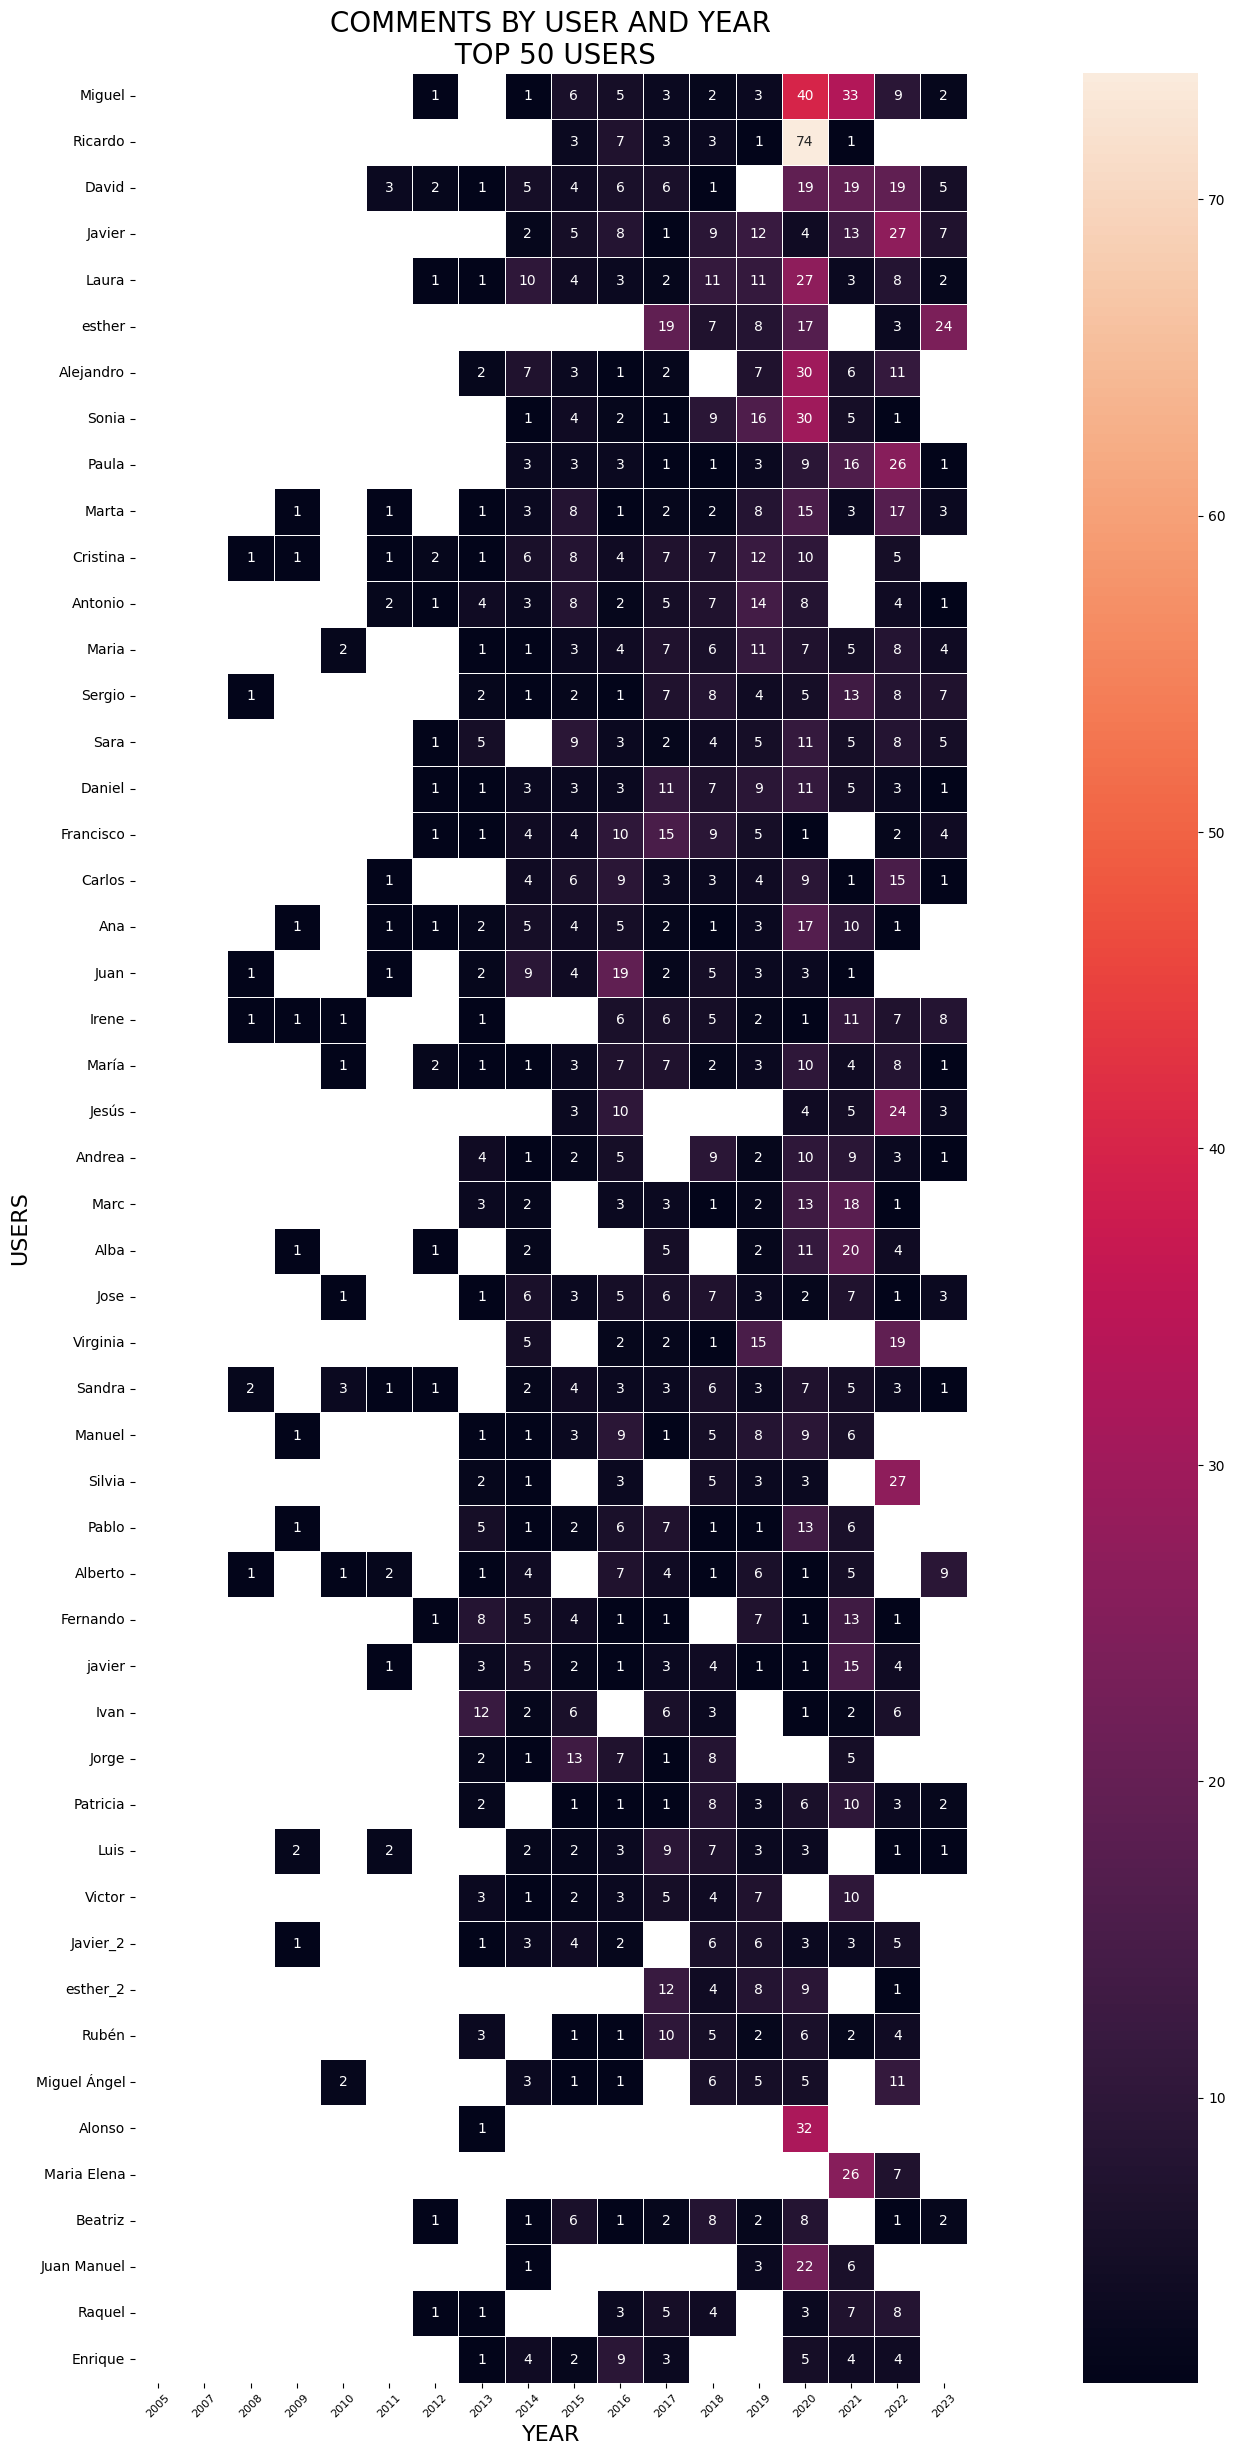

In [57]:
plt.figure(figsize=(30,30))
plt.xlabel("YEAR",fontsize=16)
plt.ylabel("USERS",fontsize=16)
plt.title("COMMENTS BY USER AND YEAR\n TOP 50 USERS",fontsize=20)
plt.xticks(rotation=45,fontsize=8)
sns.heatmap(data,
            square=True,
            linewidths=.6,
            annot=True)


file=str(r'\Resources\image\N_TOP_Commented_Users_by_YEAR')
folder+file
plt.savefig(folder+file);

En este *HEATMAP* podemos observar que no es habitual encontrar usuarios que hayan comentadoo antes de 2011.

En pocos casos hay usuarios que solo hayan comentado un par de años y con gran presencia en ese año concreto.

Lo habitual es que los usuarios que aparecen aquí tienen una presencia continua en los comentarios durante mucho tiempo y no hayan realizado solo un comentario por año.

---
**No hay que olvidar** que este estudio se basa en que estamos igualando el nombre de cada usuario con un unico registro de usuario, lo que no es real.

Como habíamos indicado al principio, no hay nada mejor que proteja el anonimato que usar solo el nombre de pila de la persona que realiza el comentario. Ya que este nombre puede correspoder con infinidad de personas.

---

### c. TAGS

#### Estudio sobre los valores de *TAGS* donde se catalogan los productos.

Vamos a realizar un estudio sobre qué tipo de productos se venden en la página web, para tener una idea del tipo de negocio que tenemos.

Aparte haremos un estudio sobre el tipo de productos que compran los distintos usuarios que hay registrados en web (teniendo en cuenta la casuística comentada sobre la identidad de cada USER).

C:\Users\Javier\AppData\Local\Temp\ipykernel_3180\993599839.py:22: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  total.iloc[:,1]=total.iloc[:,1].astype(int)


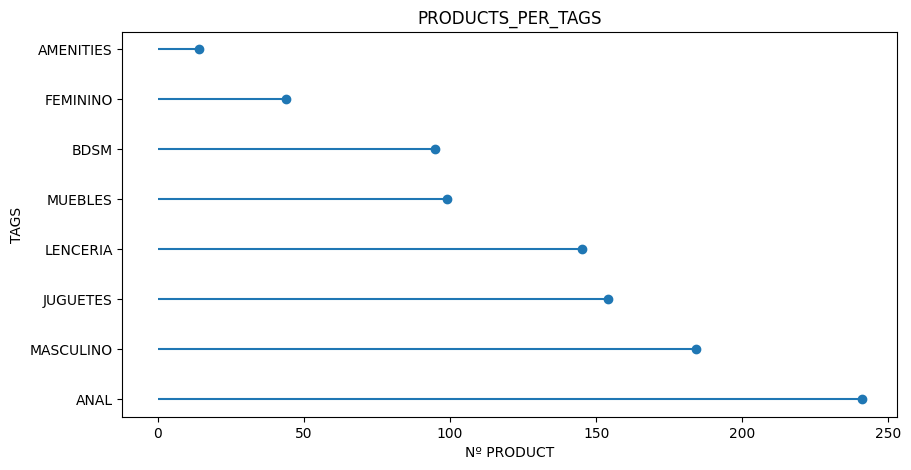

In [34]:
plt.figure(figsize=(10,5))
query = """
SELECT 'JUGUETES' AS TAGS, SUM(JUGUETES) AS valor FROM TAGS
    UNION
    SELECT 'MUEBLES' AS TAGS, SUM(MUEBLES) AS valor FROM TAGS
    UNION
    SELECT 'LENCERIA' AS TAGS, SUM(LENCERIA) AS valor FROM TAGS
    UNION
    SELECT 'MASCULINO' AS TAGS, SUM(MASCULINO) AS valor FROM TAGS
    UNION
    SELECT 'FEMININO' AS TAGS, SUM(FEMININO) AS valor FROM TAGS
    UNION
    SELECT 'ANAL' AS TAGS, SUM(ANAL) AS valor FROM TAGS
    UNION
    SELECT 'BDSM' AS TAGS, SUM(BDSM) AS valor FROM TAGS
    UNION
    SELECT 'AMENITIES' AS TAGS, SUM(AMENITIES) AS valor FROM TAGS
ORDER  BY valor DESC;
"""

total=f.sql_query(query,cursor)
total.iloc[:,1]=total.iloc[:,1].astype(int)
plt.hlines(total['TAGS'],xmin=0,
           xmax=total['valor'],)
plt.plot(total['valor'], total['TAGS'], "o")
plt.yticks(total['TAGS'])
plt.xlabel("Nº PRODUCT")
plt.ylabel("TAGS")
plt.title("PRODUCTS_PER_TAGS")

file=str(r'\Resources\image\N_Tags_product')
folder+file
plt.savefig(folder+file);

#### Estudio sobre los gustos de los usuarios.

En este último punto vamos a estudiar como son los gustos de los usuarios en función de los *tags* que hemos asignado.

Es la parte que enlaza finalmente con el proceso de *aprendizaje programado* que haremos en el siguiente punto, ya que nuestra intención es poder dar una orientación a la empresa para orientar la publicidad de los productos a los gustos de cada usuario. 

## Cerramos la BBDD.

In [45]:
conn.commit()
cursor.close()
conn.close()